In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from optimization import exhaustive_search, gauss_method, nelder_mead

In [2]:
def approx_func_linear(p, a, b):
    return p * a + b

In [3]:
def approx_func_rational(p, a, b):
    return a / (1 + b * p)

In [4]:
def to_name(method):
    return method.__name__.replace('_', ' ').capitalize()

In [5]:
def visualize_data(data, a, b, name_1, name_2):
    x_line = [i / 100 for i in range(100)]
    y_line = [a * i + b for i in x_line]
    plt.scatter([v for (v, _) in data], [v for (_, v) in data])
    plt.plot(x_line, y_line, color="orange")
    plt.legend()

In [16]:
def visualize_exhaustive(data, aprox):
    (least_sq_err, a, b), iter = exhaustive_search(data, 0, 1, 0, 1, aprox)
    visualize_data(data, a, b, "exhaustive", to_name(aprox))
    return (a, b), iter

In [6]:
def generate_data():
    a, b = np.random.random(2)
    x = [i / 100 for i in range(100)]
    tow = np.random.normal(size=100)
    y = [a * xx + tt + b for (xx, tt) in zip(x, tow)]
    return list(zip(x, y))

No handles with labels found to put in legend.


((0.0, 0.7090909090909091), 110)

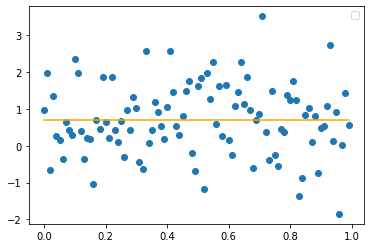

In [18]:
visualize_exhaustive(generate_data(), approx_func_linear)

No handles with labels found to put in legend.


((0.33636363636363636, 0.0), 110)

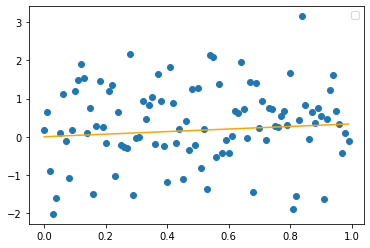

In [19]:
visualize_exhaustive(generate_data(), approx_func_rational)

In [11]:
def visualize_gauss(data, approx_func):
    f_a_b = lambda a, b: sum([(approx_func(x_p, a, b) - y_p) ** 2 for (x_p, y_p) in data])
    points, ls, iters = gauss_method(100, 1, 1, f_a_b)

    visualize_data(data, points[-1][0], points[-1][1], "gauss", to_name(approx_func))
    return points[-1], iters

No handles with labels found to put in legend.


((0.030734641140301368, 1.2140332653337231), 29)

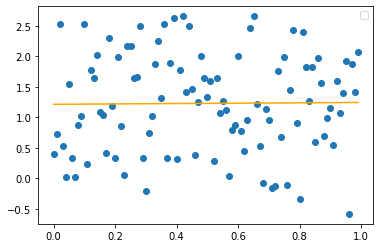

In [20]:
visualize_gauss(generate_data(), approx_func_linear)

No handles with labels found to put in legend.


((0.7130498278741606, -0.0338124539909012), 24)

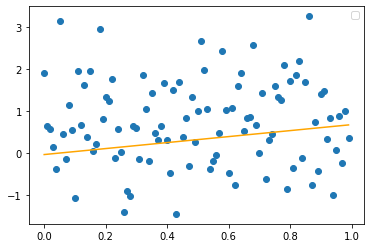

In [26]:
visualize_gauss(generate_data(), approx_func_rational)

In [10]:
def build_differencial(data, approx_func, approx_func_grad_a, approx_func_grad_b):
    f_a_b = lambda a, b: sum([(approx_func(x_p, a, b) - y_p) ** 2 for (x_p, y_p) in data])
    f_grad_a_a_b = lambda a, b: sum(
        [(approx_func(x_p, a, b) - y_p) * 2 * approx_func_grad_a(x_p, a, b) for (x_p, y_p) in data])
    f_grad_b_a_b = lambda a, b: sum(
        [(approx_func(x_p, a, b) - y_p) * 2 * approx_func_grad_b(x_p, a, b) for (x_p, y_p) in data])

    return f_a_b, f_grad_a_a_b, f_grad_b_a_b

def visualize_nelder_mead(data, apox):
    f_a_b, _, _ = build_differencial(data, apox, lambda a, b, c: 0, lambda a, b, c: 0)
    _, best, iters = nelder_mead(f_a_b)

    visualize_data(data, best[0], best[1], "nelder_mead", to_name(apox))
    return best, iters

In [ ]:
visualize_nelder_mead(generate_data(), approx_func_linear)

In [ ]:
visualize_nelder_mead(generate_data(), approx_func_rational)

No handles with labels found to put in legend.


 final_simplex: (array([[0.91449192, 0.15131212],
       [0.91449884, 0.15126909],
       [0.91439551, 0.15134711]]), array([101.56663495, 101.56663495, 101.56663501]))
           fun: 101.56663495192528
       message: 'Optimization terminated successfully.'
          nfev: 130
           nit: 68
        status: 0
       success: True
             x: array([0.91449192, 0.15131212])


(array([0.91449192, 0.15131212]), 0)

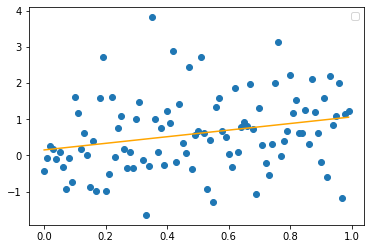

No handles with labels found to put in legend.


 final_simplex: (array([[0.57573309, 0.26599716],
       [0.5757118 , 0.26596075],
       [0.57574855, 0.26606947]]), array([101.32631056, 101.32631056, 101.32631056]))
           fun: 101.32631055565517
       message: 'Optimization terminated successfully.'
          nfev: 141
           nit: 73
        status: 0
       success: True
             x: array([0.57573309, 0.26599716])


(array([0.57573309, 0.26599716]), 0)

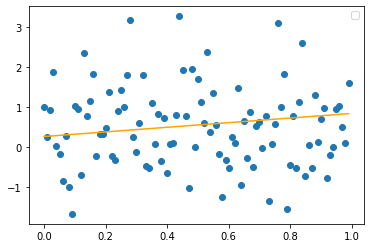

In [17]:
visualize_nelder_mead(generate_data(), approx_func_rational)